In [60]:
import math
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [61]:
# Read the data
X = pd.read_csv('train.csv', index_col='Id')

In [62]:
X

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1255          60       RL         60.0     6931   Pave   NaN      Reg   
1256          50       RM         52.0     6240   Pave   NaN      Reg   
1257          20       RL         91.0    14303   Pave   NaN      IR1   
1258          30       RL         56.0     4060   Pave   NaN      Reg   
1259          80       RL         59.0     9587   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                    ...                                     
1            Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
...          ...       ...       ...  ...      ...    ...   ...         ...   
1255         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1256         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1257         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
1258         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
1259         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1255       0      7    2008        WD         Normal     165400  
1256       0     11    2007        WD         Normal     127500  
1257       0      8    2008        WD         Normal     301500  
1258       0      7    2009        WD         Normal      99900  
1259       0      7    2008        WD         Normal     190000  

[1259 rows x 80 columns]

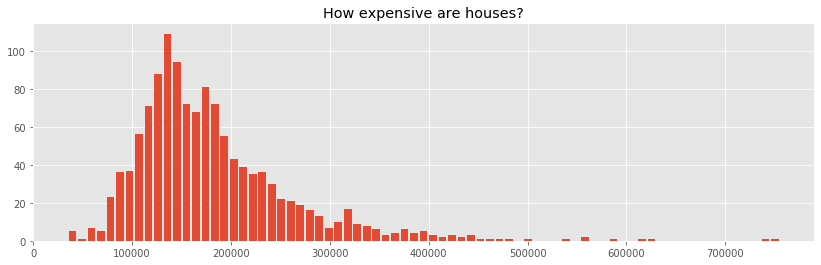

In [63]:
X.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

In [8]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    X.YearBuilt.min(), X.YearBuilt.max()))

Oldest house built in 1875. Newest house built in 2010.


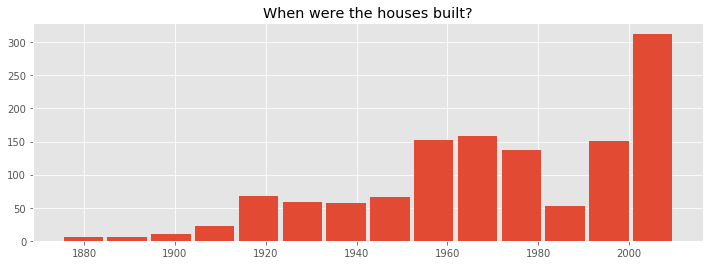

In [9]:
X.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

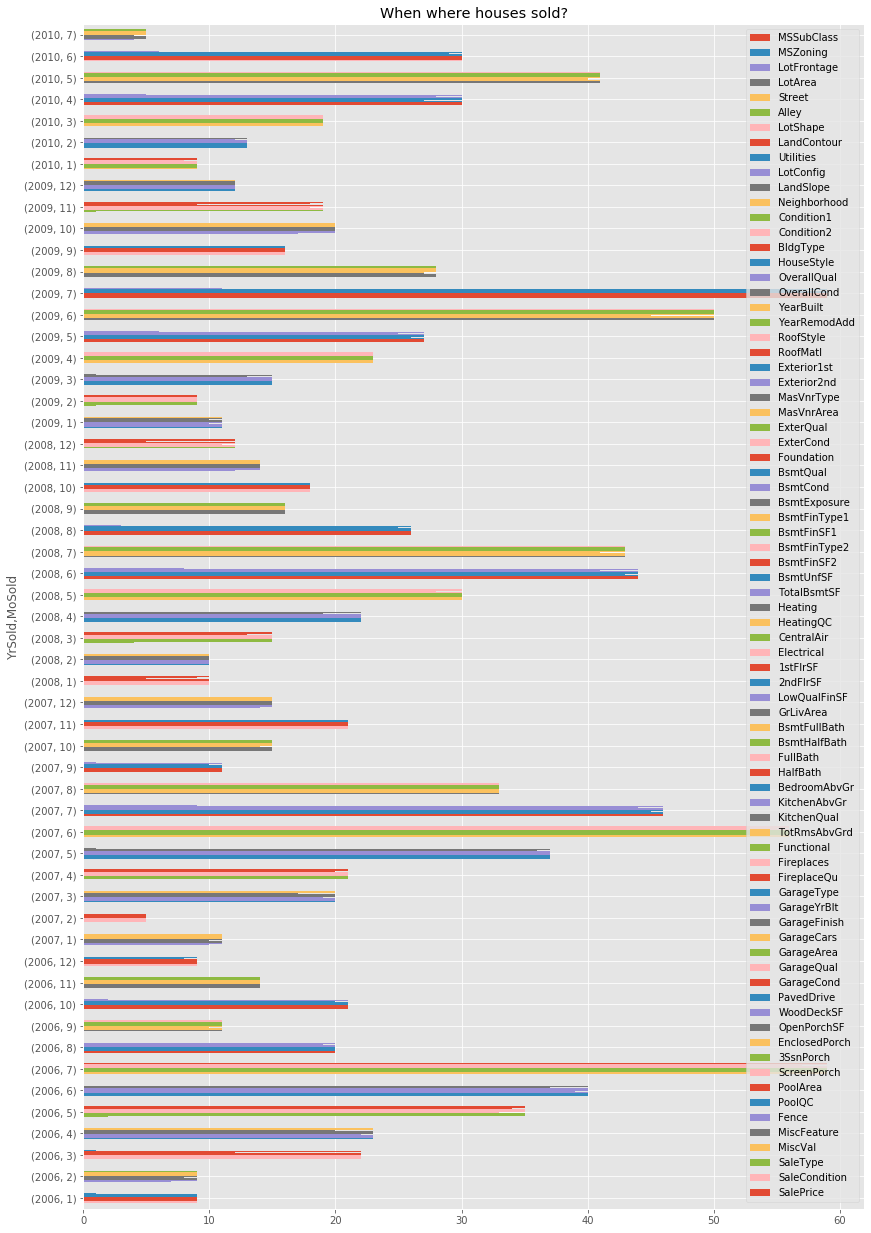

In [10]:
# When where houses sold?
X.groupby(['YrSold','MoSold']).count().plot(kind='barh', figsize=(14,21.8))
plt.title('When where houses sold?')
plt.show()

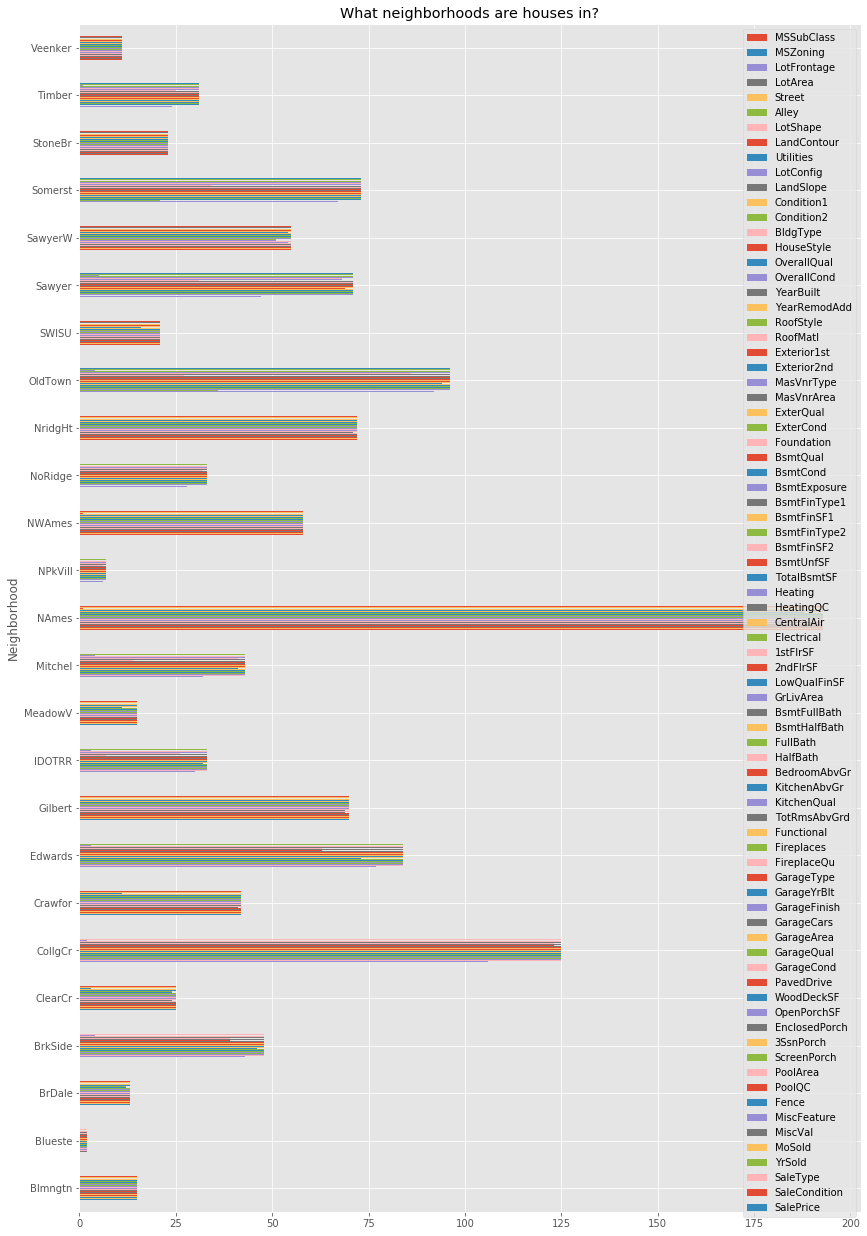

In [11]:
# Where are houses?

X.groupby('Neighborhood').count().plot(kind='barh', figsize=(14,21.85))
plt.title('What neighborhoods are houses in?')
plt.show()

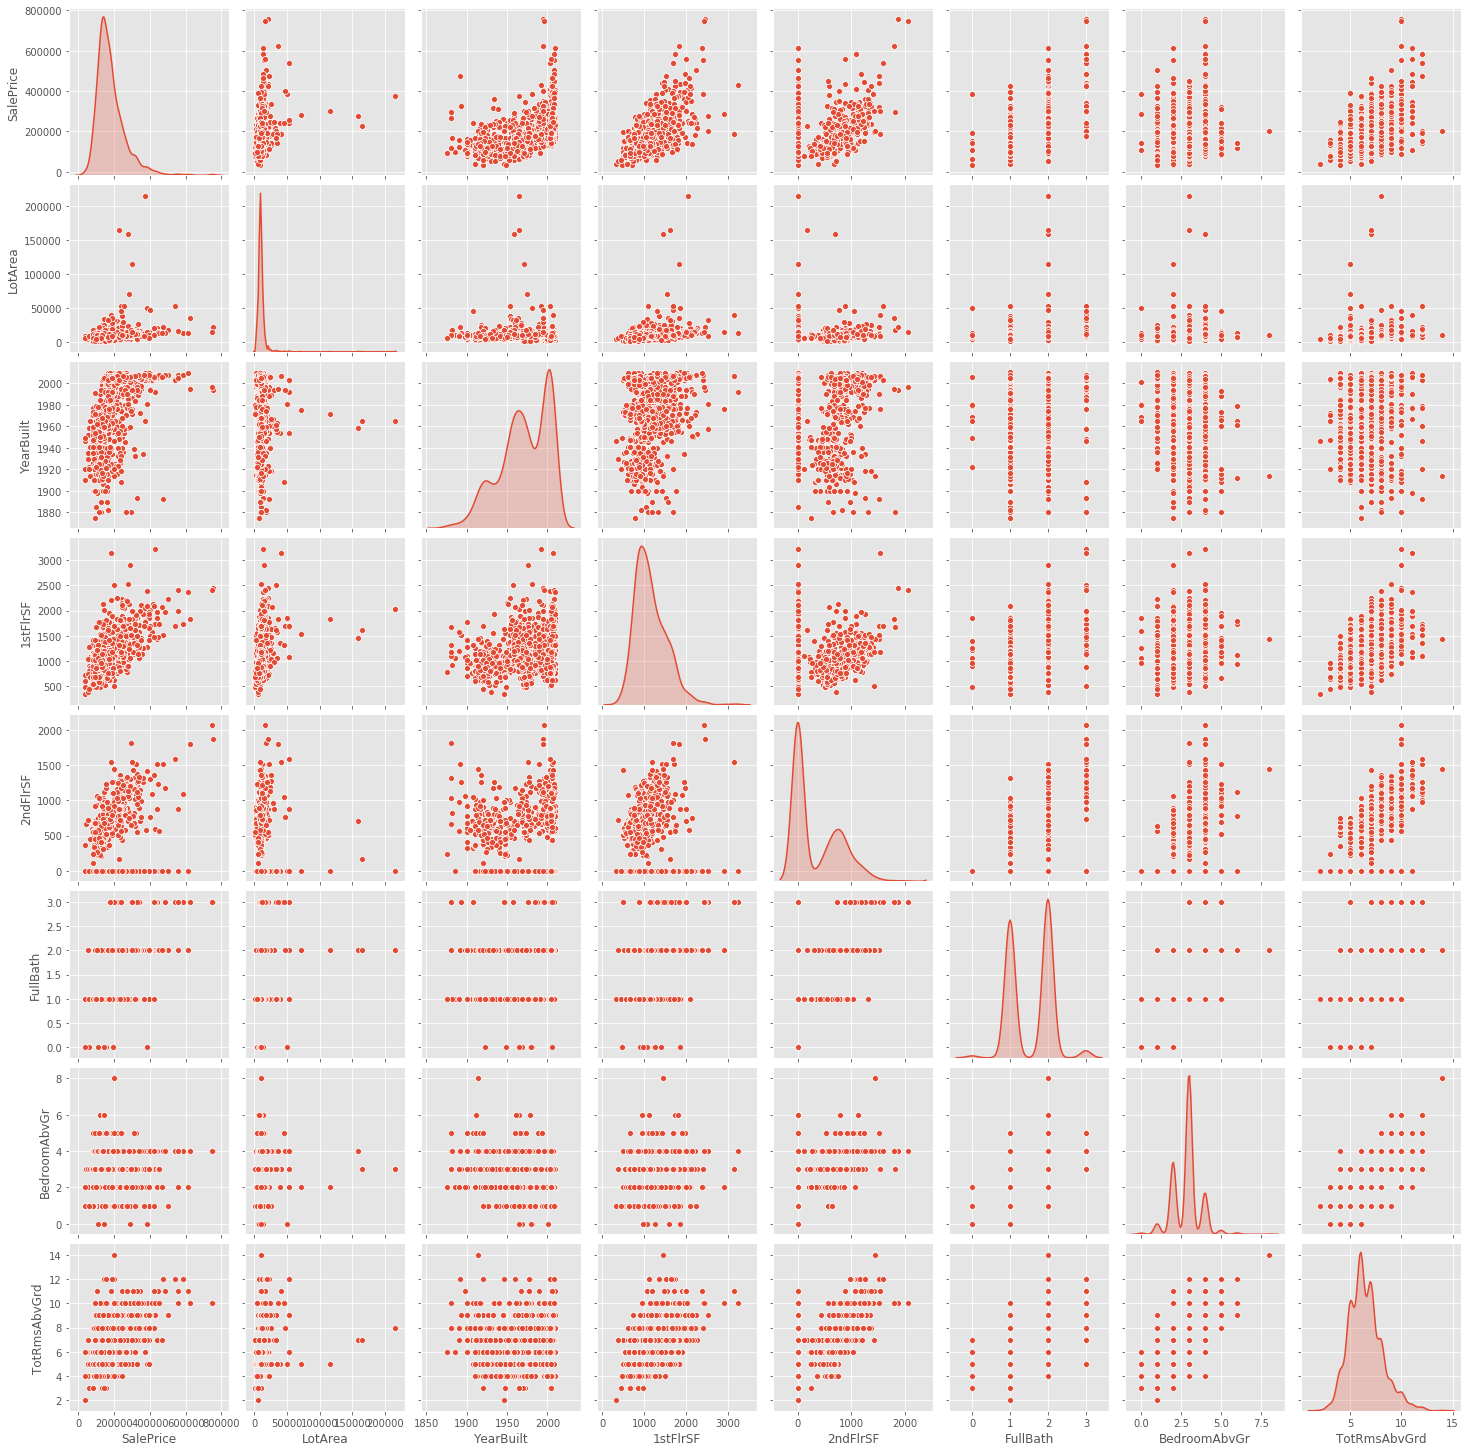

In [12]:
sns.pairplot(X[["SalePrice", "LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]], diag_kind="kde")

In [64]:
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [77]:
import time

In [78]:
start_time = time.time()
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.008999824523925781 seconds ---


In [81]:
# Select numeric columns
start_time = time.time()
numeric_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0010001659393310547 seconds ---


In [83]:
# start_time = time.time()
# numeric_cols=[]
# for cname in X_train.columns:
#     if X_train[cname].dtype in ['int64', 'float64']:
#         numeric_cols.append(cname)
# print("--- %s seconds ---" % (time.time() - start_time))

In [84]:
# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train[my_cols].copy()
X_test = X_test[my_cols].copy()

In [85]:
# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [86]:
len(numeric_cols)

36

In [87]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1007, 226)
LotFrontage    175
MasVnrArea       6
GarageYrBlt     53
dtype: int64


In [88]:
X_train.isnull().sum() #to get all columns have or not missing values

MSSubClass                 0
LotFrontage              175
LotArea                    0
OverallQual                0
OverallCond                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 226, dtype: int64

In [89]:
from sklearn.impute import SimpleImputer


my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

In [90]:
# Preprocessed training and validation features
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_test = pd.DataFrame(final_imputer.transform(X_test))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_test.columns = X_test.columns

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(final_X_train)
X_train_scaled = scaler.transform(final_X_train)
X_test_scaled = scaler.transform(final_X_test)

In [91]:
np.array(y_train)

array([320000, 212000, 284000, ..., 112000, 234000, 221000], dtype=int64)

# Regression Lasso

In [97]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = ElasticNetCV(l1_ratio=1,fit_intercept=True,alphas=[0.01,0.05,0.1,0.2,0.5,1,2])

model.fit(X=X_train_scaled,y=np.log(y_train))
y_pred = model.predict(X=X_test_scaled)
mean_squared_error(y_true=np.log(y_test),y_pred=np.log(y_pred))


91.33294375782478

In [56]:
model.alpha_

0.01

In [57]:
model.l1_ratio_

1

In [96]:
elasticnetmodel = ElasticNet(alpha=model.alpha_,l1_ratio= model.l1_ratio_)

elasticnetmodel.fit(X=X_train_scaled,y=np.log(y_train))
y_pred = elasticnetmodel.predict(X=X_test_scaled)
mean_squared_error(y_true=np.log(y_test),y_pred=np.log(y_pred))

91.33294375782478

# Regresión Elasticnet

## 1. Tunning de Hiperparámetros

In [98]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = ElasticNetCV(l1_ratio=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],fit_intercept=True,alphas=[0.01,0.05,0.1,0.2,0.5,1,2])

model.fit(X=X_train_scaled,y=np.log(y_train))
y_pred = model.predict(X=X_test_scaled)
mean_squared_error(y_true=np.log(y_test),y_pred=np.log(y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.984766239771915, tolerance: 0.012535127215157472
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.996626991755363, tolerance: 0.012535127215157472
  tol, rng, random,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.232964268204356, tolerance: 0.012913026960815158
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.079033308965299, tolerance: 0.012913026960815158
  tol, rng, random

91.32711699698297

In [99]:
model.alpha_

0.01

In [100]:
model.l1_ratio_

0.3

# 2. Entrenamiento utilizando el mejor conjunto de HP

In [101]:
elasticnetmodel = ElasticNet(alpha=model.alpha_,l1_ratio= model.l1_ratio_)

elasticnetmodel.fit(X=X_train_scaled,y=np.log(y_train))
y_pred = elasticnetmodel.predict(X=X_test_scaled)
mean_squared_error(y_true=np.log(y_test),y_pred=np.log(y_pred))

91.32711699698297

# Regresión Ridge

## 1. Tunning de Hiperparámetros

In [102]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = ElasticNetCV(l1_ratio=0,fit_intercept=True,alphas=[0.01,0.05,0.1,0.2,0.5,1,2])

model.fit(X=X_train_scaled,y=np.log(y_train))
y_pred = model.predict(X=X_test_scaled)
mean_squared_error(y_true=np.log(y_test),y_pred=np.log(y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.984766239771915, tolerance: 0.012535127215157472
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.996626991755363, tolerance: 0.012535127215157472
  tol, rng, random,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.143602999217571, tolerance: 0.012439060707952447
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.266313417531173, tolerance: 0.012439060707952447
  tol, rng, random, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.767763573387236, tolerance: 0.013145055028664825
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2834777620248787, tolerance: 0.013145055028664825
  tol, rng, random, positive)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6

91.33016454182587

In [103]:
model.alpha_

0.2

In [104]:
model.l1_ratio_

0

## 2. Entrenamiento utilizando el mejor conjunto de HP

In [105]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = ElasticNet(l1_ratio=model.l1_ratio_,fit_intercept=True,alpha=model.alpha_)

model.fit(X=X_train_scaled,y=np.log(y_train))
y_pred = model.predict(X=X_test_scaled)
mean_squared_error(y_true=np.log(y_test),y_pred=np.log(y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.511339343621501, tolerance: 0.015700775018962942
  positive)


91.33016454182587

In [108]:
import pickle

In [110]:
output = open(r'C:\Users\AValdebenito\Documents\Cursos\econometria\Lab\modelo.pkl', 'wb')
pickle.dump(model, output)
output.close()

In [111]:
# explorar la lectura de objetos pkl para posterior inferencia